#Image Resizing in Deep Learning

##Why Do We Need Image Resizing?
Image resizing is crucial in machine learning and computer vision for several reasons:

- Standardization: Neural networks require fixed input sizes - all images must be the same dimensions
- Memory Efficiency: Smaller images require less memory and computational power
- Feature Preservation: Sometimes we need to focus on specific parts of images (through cropping)
- Data Augmentation: Resizing can be used to create variations of training data
- Performance: Different model architectures might perform better with different image sizes

In [ ]:
# Install TensorFlow (if not installed)
!pip install tensorflow matplotlib numpy

In [ ]:
# Import necessary libraries
import tensorflow as tf  # For image processing operations
import numpy as np      # For numerical operations
import matplotlib.pyplot as plt  # For visualization
from tensorflow.keras.datasets import fashion_mnist

In [ ]:
# Load Fashion MNIST dataset
# Fashion MNIST contains 70,000 grayscale images of size 28x28 pixels
# Each image represents a fashion item (clothes, shoes, etc.)
(X_train, _), (X_test, _) = fashion_mnist.load_data()

In [ ]:
# Select and prepare a sample image
sample_image = X_test[5]  # Take one image from test set
# Add channel dimension to make it (28,28,1) - required for tensorflow operations
sample_image = np.expand_dims(sample_image, axis=-1)


In [ ]:
# Convert numpy array to TensorFlow tensor for tensor operations
image_tensor = tf.convert_to_tensor(sample_image, dtype=tf.float32)

A tensor is a multi-dimensional array used to represent data in numerical computations, particularly in machine learning and deep learning. Images are stored as tensors by converting their pixel values into arrays, where the dimensions depend on the image type:

Grayscale image: 2D tensor
(
ℎ
𝑒
𝑖
𝑔
ℎ
𝑡
,
𝑤
𝑖
𝑑
𝑡
ℎ
)
(height,width).
RGB image: 3D tensor
(
ℎ
𝑒
𝑖
𝑔
ℎ
𝑡
,
𝑤
𝑖
𝑑
𝑡
ℎ
,
𝑐
ℎ
𝑎
𝑛
𝑛
𝑒
𝑙
𝑠
)
(height,width,channels), with 3 channels for Red, Green, and Blue. These tensors allow efficient manipulation and processing of image data in frameworks like TensorFlow and PyTorch.

In [ ]:
# Function to resize images using TensorFlow's resize operation
def resize_image(image, new_size=(64, 64)):
    """
    Resize an image to the specified dimensions using TensorFlow.
    Parameters:
    image (Tensor): Input image tensor.
    new_size (tuple): Target size (height, width).
    Returns:
    Tensor: Resized image.
    """
    return tf.image.resize(image, new_size)


In [ ]:
# Function for center cropping - useful when you want to focus on the central part
def center_crop_image(image, crop_fraction=0.7):
    """
    Crop the center of an image using TensorFlow.
    Parameters:
    image (Tensor): Input image tensor.
    crop_fraction (float): Fraction of the original image to retain.
    Returns:
    Tensor: Cropped image.
    """
    return tf.image.central_crop(image, crop_fraction)

In [ ]:
# Function for manual cropping - useful when you want to crop specific regions
def manual_crop(image, top=5, left=5, height=20, width=20):
    """
    Manually crop an image using slicing.
    Parameters:
    image (Tensor): Input image tensor.
    top, left (int): Starting pixel positions.
    height, width (int): Cropped region size.
    Returns:
    Tensor: Cropped image.
    """
    return image[top:top+height, left:left+width, :]

In [ ]:
# Apply different resizing and cropping operations to our sample image
resized_image = resize_image(image_tensor, (64, 64))  # Upscale to 64x64
center_cropped_image = center_crop_image(image_tensor, 0.7)  # Keep 70% of center
manually_cropped_image = manual_crop(image_tensor, 4, 4, 20, 20)  # Custom crop

In [ ]:
# Convert tensors back to NumPy arrays for visualization
# matplotlib requires numpy arrays for plotting
resized_image_np = resized_image.numpy().astype(np.uint8)
center_cropped_image_np = center_cropped_image.numpy().astype(np.uint8)
manually_cropped_image_np = manually_cropped_image.numpy().astype(np.uint8)

In [ ]:
# Create visualization of all operations
plt.figure(figsize=(12, 4))


<Figure size 1200x400 with 0 Axes>

<Figure size 1200x400 with 0 Axes>

(-0.5, 27.5, 27.5, -0.5)

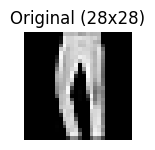

In [ ]:
# Display original image
plt.subplot(1, 4, 1)
plt.imshow(sample_image.squeeze(), cmap='gray')
plt.title("Original (28x28)")
plt.axis('off')

(-0.5, 63.5, 63.5, -0.5)

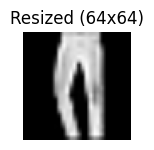

In [ ]:
# Display resized image
plt.subplot(1, 4, 2)
plt.imshow(resized_image_np.squeeze(), cmap='gray')
plt.title("Resized (64x64)")
plt.axis('off')


(-0.5, 19.5, 19.5, -0.5)

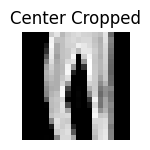

In [ ]:
# Display center cropped image
plt.subplot(1, 4, 3)
plt.imshow(center_cropped_image_np.squeeze(), cmap='gray')
plt.title("Center Cropped")
plt.axis('off')

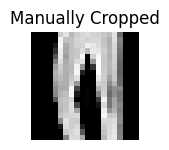

In [ ]:
# Display manually cropped image
plt.subplot(1, 4, 4)
plt.imshow(manually_cropped_image_np.squeeze(), cmap='gray')
plt.title("Manually Cropped")
plt.axis('off')

plt.show()

Three different types of image transformations are demonstrated:

- Resizing (changing dimensions while keeping full image)
- Center cropping (focusing on middle portion)
- Manual cropping (selecting specific regions)